In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,8

In [2]:
dataset = pd.read_csv("IMMPORTATION_TOTAL.csv")
# dataset['Year'] = pd.to_datetime(dataset['Year'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['Year'])

In [3]:
from datetime import datetime
indexedDataset

,Importation of Girls
Year,
2001,114
2002,76
2003,46
2004,89
2005,149
2006,67
2007,61
2008,67
2009,48


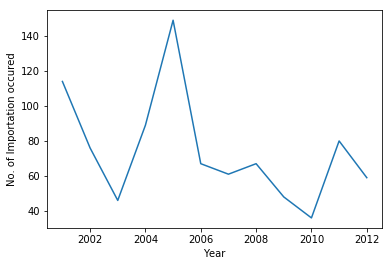

In [6]:
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
plt.plot(indexedDataset)

In [7]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = indexedDataset.rolling(window=2).mean() #for determining the rolling mean and standard deviation
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

      Importation of Girls
Year                      
2001                   NaN
2002                  95.0
2003                  61.0
2004                  67.5
2005                 119.0
2006                 108.0
2007                  64.0
2008                  64.0
2009                  57.5
2010                  42.0
2011                  58.0
2012                  69.5       Importation of Girls
Year                      
2001                   NaN
2002             26.870058
2003             21.213203
2004             30.405592
2005             42.426407
2006             57.982756
2007              4.242641
2008              4.242641
2009             13.435029
2010              8.485281
2011             31.112698
2012             14.849242


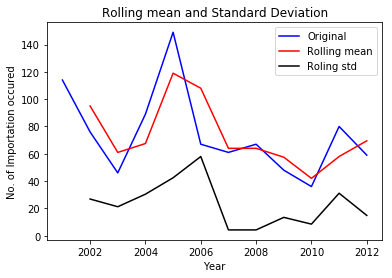

In [9]:
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Roling std')
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
plt.title('Rolling mean and Standard Deviation')
plt.show(block=False)



In [10]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of dickey-fuller test:')
dftest = adfuller(indexedDataset['Importation of Girls'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Text(0,0.5,'No. of Importation occured')

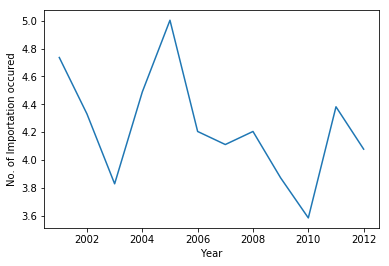

In [12]:
#as you can see the value of p is 0.9 ....but the null hypothesis should be as less as possible ...must be around 0.5
#hence we cannot reject the null hypothesis ...this shows that the data is not stationary 
indexedDataset_logScale = np.log(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_logScale) #since log of the data is done the y axis values changes accordingly bt the trend remains the same
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")

Text(0,0.5,'No. of Importation occured')

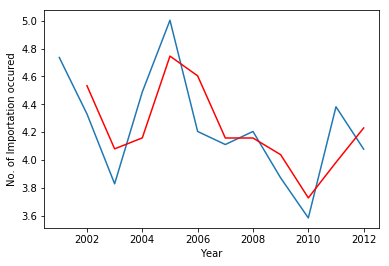

In [15]:
#calculating the mean and std of the log value
movingAverage = indexedDataset_logScale.rolling(window=2).mean()
movingSTD=indexedDataset_logScale.rolling(window=2).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
#over here as well the data is not stationary the mean keeps changing according to the time

In [16]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Importation of Girls
Year,
2002,-0.202733
2003,-0.251046
2004,0.329997
2005,0.257655
2006,-0.399627
2007,-0.046909
2008,0.046909
2009,-0.166746
2010,-0.143841


In [19]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.xlabel("Year")
    plt.ylabel("No. of Assault on women occured")
    plt.show(block=False)
 
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Importation of Girls'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

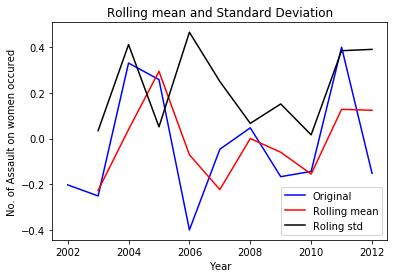

Results of dickey-fuller test:
Test statstic                 -1.403315
p-value                        0.580686
#Lags Used                     3.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [20]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Text(0,0.5,'No. of Assault on women occured')

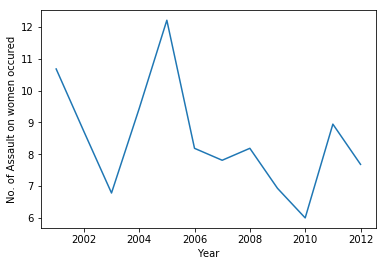

In [21]:
indexedDataset_sqScale = np.sqrt(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_sqScale)
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

Text(0,0.5,'No. of Importation occured')

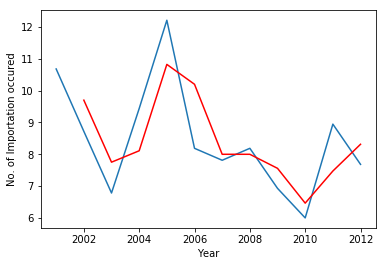

In [23]:
movingAveragesq = indexedDataset_sqScale.rolling(window=2).mean()
movingSTDsq = indexedDataset_sqScale.rolling(window=2).std()
plt.plot(indexedDataset_sqScale)
plt.plot(movingAveragesq,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")

In [24]:
datasetsqScaleMinusMovingAverage = indexedDataset_sqScale - movingAveragesq
datasetsqScaleMinusMovingAverage

datasetsqScaleMinusMovingAverage.dropna(inplace=True)
datasetsqScaleMinusMovingAverage

,Importation of Girls
Year,
2002,-0.979640
2003,-0.967734
2004,1.325826
2005,1.386287
2006,-2.010601
2007,-0.187552
2008,0.187552
2009,-0.628575
2010,-0.464102


Text(0,0.5,'No. of Importation occured')

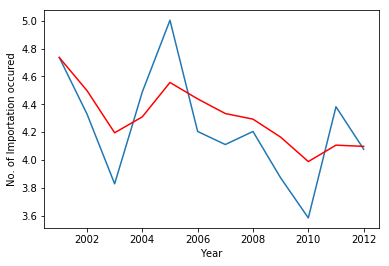

In [25]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAveragesq = timeseries.rolling(window=2).mean()
    movingSTDsq = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAveragesq, color='red', label='Rolling mean')
    std = plt.plot(movingSTDsq, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Importation of Girls'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

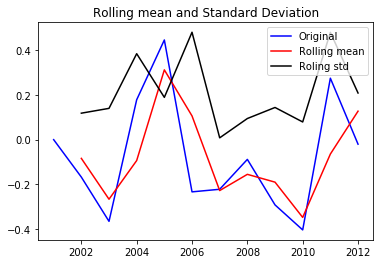

Results of dickey-fuller test:
Test statstic                 -1.567693
p-value                        0.499799
#Lags Used                     3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [27]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Text(0,0.5,'No. of Importation occured')

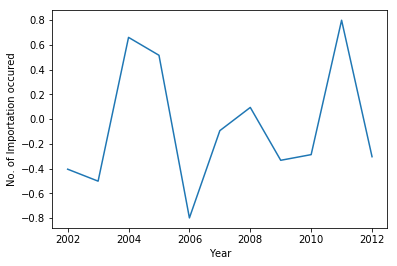

In [28]:
datasetLogDiffShifting = indexedDataset_logScale- indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")

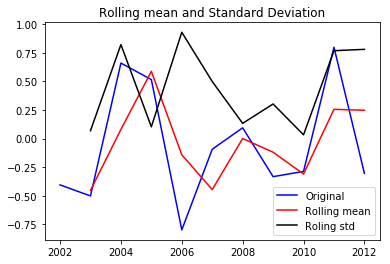

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


In [29]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

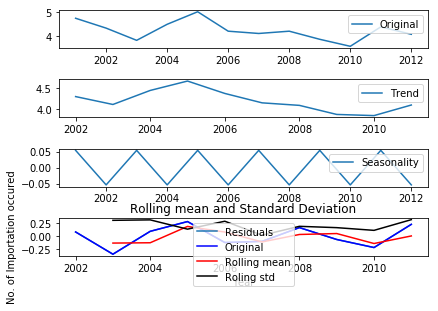

Results of dickey-fuller test:
Test statstic                 -1.193947
p-value                        0.676194
#Lags Used                     2.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale , label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


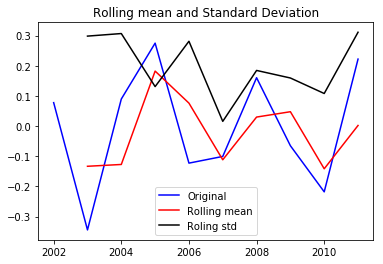

Results of dickey-fuller test:
Test statstic                 -1.193947
p-value                        0.676194
#Lags Used                     2.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [31]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


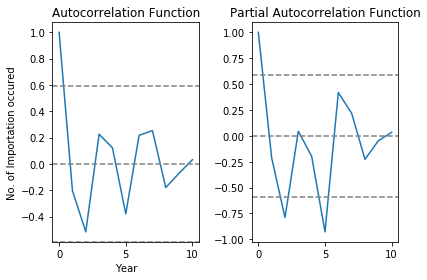

In [66]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags =10, method='ols')

#plotting acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR model


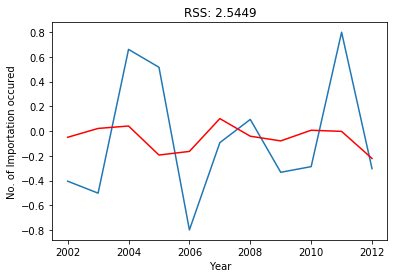

In [76]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order=(1,1,0)) #here the order includes value from the acf and pacf  ie p and q are the first downfall of the graph ie 1 and the midde value is the difference 
#the RSS value must be as low as possible
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Importation of Girls"])**2))
print('Plotting AR model')

Plotting AR model


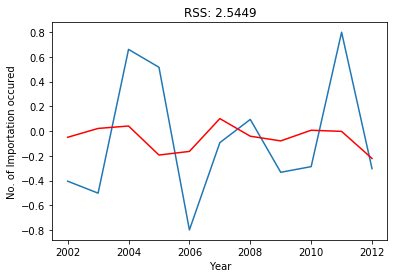

In [77]:
#MA Model
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order= (1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting["Importation of Girls"])**2))
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")
print('Plotting AR model')


Text(0,0.5,'No. of Importation occured')

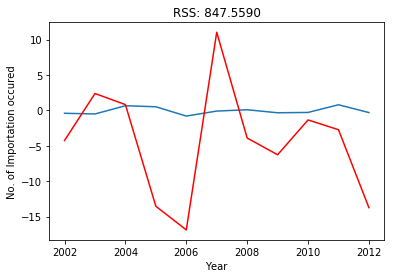

In [78]:
model = ARIMA(indexedDataset, order = (1,1,0))
import warnings
warnings.filterwarnings('ignore')
results_ARIMA =  model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Importation of Girls'])**2))
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")



In [70]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
2002    -4.245780
2003     2.388853
2004     0.816396
2005   -13.532275
2006   -16.873746
dtype: float64


In [71]:
#converting it to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
2002    -4.245780
2003    -1.856927
2004    -1.040531
2005   -14.572806
2006   -31.446553
2007   -20.409185
2008   -24.310161
2009   -30.569822
2010   -31.915554
2011   -34.637187
2012   -48.366019
dtype: float64


In [72]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Importation of Girls'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
2001    4.736198
2002    0.490419
2003    2.879272
2004    3.695668
2005   -9.836608
dtype: float64

Text(0,0.5,'No. of Importation occured')

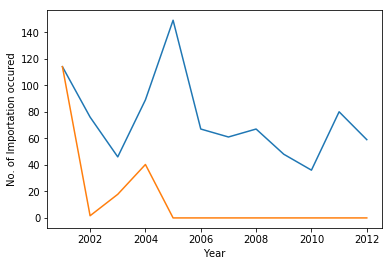

In [73]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")

#orange line is the model that we have fitted 

In [74]:
 #before predicitng check the no. of rows
indexedDataset_logScale

,Importation of Girls
Year,
2001,4.736198
2002,4.330733
2003,3.828641
2004,4.488636
2005,5.003946
2006,4.204693
2007,4.110874
2008,4.204693
2009,3.871201


Text(0,0.5,'No. of Importation occured')

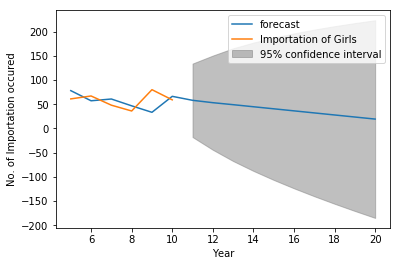

In [80]:
results_ARIMA.plot_predict(6,21)
import warnings
warnings.filterwarnings('ignore')
plt.xlabel("Year")
plt.ylabel("No. of Importation occured")